# **Analyzing Weekly Sales in Walmart Dataset Using Statistical Models**

## **Abstract**

> This project involves the statistical analysis of Walmart's weekly sales dataset using various methods. The aim of this project is to identify significant trends and patterns in the data that can be used to improve the performance of Walmart stores. The dataset contains information on weekly sales, as well as several other variables such as store size, location, and the presence of special holiday events.The findings from this study will provide valuable insights into the factors that affect Walmart's weekly sales. These insights can be used to make data-driven decisions that can improve the performance of Walmart stores. Furthermore, the methods used in this study can be applied to other retail datasets to gain a better understanding of customer behavior and to improve the efficiency of retail operations.



# **Chapter 1: Introduction**

>The retail industry is highly competitive, and companies are constantly looking for ways to gain a competitive edge. Walmart is one of the largest retail chains in the world and is known for its ability to leverage technology and data to improve its operations. In this project, we will be analyzing the Walmart Weekly Sales Dataset to gain insights into the factors that affect sales and to develop a predictive model for future sales.

>The Walmart Weekly Sales Dataset contains historical sales data for 45 Walmart stores located in different regions. The dataset includes information about weekly sales, store size, holiday events, temperature, fuel price, and other factors that may impact sales. By analyzing this data, we hope to identify trends and patterns that can help Walmart make data-driven decisions.

>We will be using various statistical methods such as comparing two samples, analysis of variance, analysis of categorical data, linear regression, resampling methods, linear model selection and regularization, and moving beyond linearity. These methods will help us to identify the most significant factors that impact sales and to develop a model that can accurately predict future sales.

>The insights gained from this project will be valuable for Walmart and other retailers in the industry. By understanding the factors that impact sales, retailers can make informed decisions about pricing, inventory management, and marketing strategies. Additionally, developing a predictive model for sales can help retailers plan for future demand and optimize their operations.

>Overall, this project aims to demonstrate the value of statistical analysis and data-driven decision-making in the retail industry. By leveraging the power of data, retailers can gain a competitive edge and improve their operations in a rapidly evolving industry.

# **Chapter 2: Data Description**

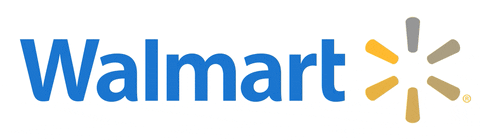

>The data used in this project is the Walmart Weekly Sales dataset, obtained from Kaggle (https://www.kaggle.com/datasets/yasserh/walmart-dataset). 

>The dataset consists of 6435 weekly sales records from 45 stores. Each record contains information on the weekly sales, as well as the following features:

>```
*   Store : The store number
*   Date : Week of the sales
*   Weekly_Sales : Sales for the given store
*   Holiday_Flag : If week is a special holiday week
*   Temperature : Temperature on sales day
*   Fuel_Price : Cost of fuel in the region of store
*   CPI : Customer price index
*   Unemployment : Prevailing unemployment rate in percentage





>Before starting the analysis, the data was explored to identify any issues that could affect the accuracy of the analysis. The first step was to check for missing values, and it was found that there were no missing values in the dataset. However, some of the features, such as temperature and fuel price, had a wide range of values. Therefore, these features were standardized to ensure that they had the same scale as the other features.

>After the data cleaning process, the distribution of the weekly sales data was analyzed. A histogram was plotted to visualize the distribution of weekly sales, which showed a skewed distribution. Therefore, the weekly sales data was transformed using the natural logarithm to reduce the skewness and improve the normality of the data.

>In addition, the relationships between the features and the weekly sales were explored using scatter plots and pair plots. The scatter plot between weekly sales and store number indicated that some stores had higher sales than others. Therefore, one-hot encoding was performed on the store number feature to perform linear regression effectively later.

>Overall, the data was relatively clean and did not require significant preprocessing. The issues that were identified were resolved using standard statistical techniques. The final dataset was used for the subsequent analysis.

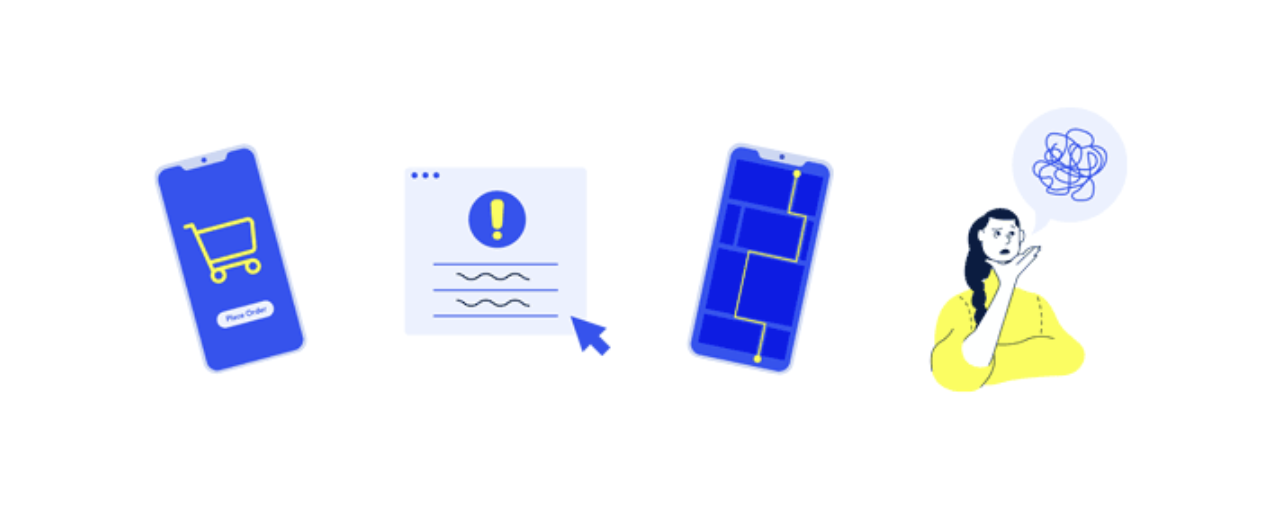

### **Importing Required Libraries**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import ttest_ind, f_oneway, mannwhitneyu, chi2_contingency
from scipy.stats import norm, shapiro
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import Ridge, LinearRegression, RidgeCV
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import sys

In [ ]:
pd.set_option('display.max_columns', None)
df = pd.read_csv("dataset/Walmart.csv")
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


In [ ]:
df.describe()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,6435.000000,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000
mean,23.000000,1.046965e+06,0.069930,60.663782,3.358607,171.578394,7.999151
std,12.988182,5.643666e+05,0.255049,18.444933,0.459020,39.356712,1.875885
min,1.000000,2.099862e+05,0.000000,-2.060000,2.472000,126.064000,3.879000
25%,12.000000,5.533501e+05,0.000000,47.460000,2.933000,131.735000,6.891000
50%,23.000000,9.607460e+05,0.000000,62.670000,3.445000,182.616521,7.874000
75%,34.000000,1.420159e+06,0.000000,74.940000,3.735000,212.743293,8.622000
max,45.000000,3.818686e+06,1.000000,100.140000,4.468000,227.232807,14.313000


In [ ]:
df.isnull().sum()

Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64

In [ ]:
df.drop(columns = ["Date"],inplace = True)

### **Exploratory Data Analysis**

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Store,6435.0,2.300000e+01,12.988182,1.000,12.000,23.000000,3.400000e+01,4.500000e+01
Weekly_Sales,6435.0,1.046965e+06,564366.622054,209986.250,553350.105,960746.040000,1.420159e+06,3.818686e+06
Holiday_Flag,6435.0,6.993007e-02,0.255049,0.000,0.000,0.000000,0.000000e+00,1.000000e+00
Temperature,6435.0,6.066378e+01,18.444933,-2.060,47.460,62.670000,7.494000e+01,1.001400e+02
Fuel_Price,6435.0,3.358607e+00,0.459020,2.472,2.933,3.445000,3.735000e+00,4.468000e+00
CPI,6435.0,1.715784e+02,39.356712,126.064,131.735,182.616521,2.127433e+02,2.272328e+02
Unemployment,6435.0,7.999151e+00,1.875885,3.879,6.891,7.874000,8.622000e+00,1.431300e+01


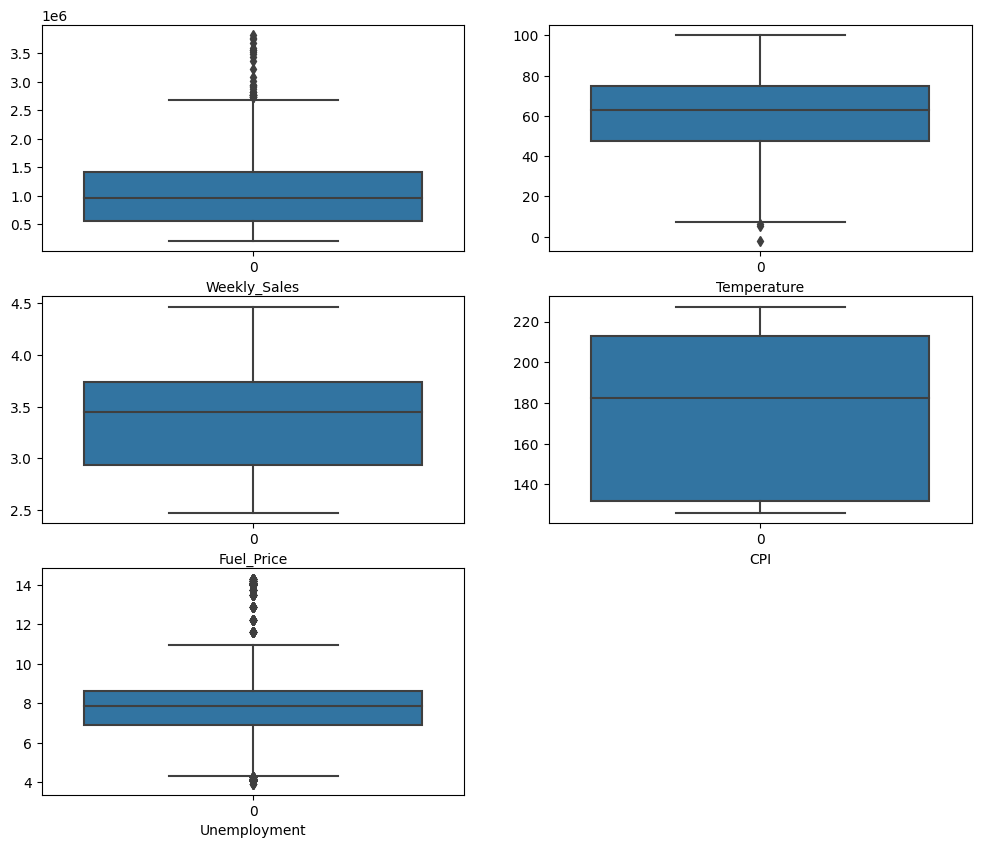

In [ ]:
pno = 1
plt.figure(figsize = (12,10))
for i in ["Weekly_Sales","Temperature","Fuel_Price","CPI","Unemployment"]:
     if pno<=5:
        plt.subplot(3,2,pno);
        pno+=1
        sns.boxplot(df[i]);
        plt.xlabel(i)

In [ ]:
#Treating the outliners using z score
def treat_outliers():
    l = ["Weekly_Sales","Temperature","Unemployment"]
    for i in l:
        z = np.abs(stats.zscore(df[i]))
        df[i] = np.where(z > 3, np.nan, df[i])
        df[i] = df[i].fillna(df[i].median())

treat_outliers()

***After analyzing our dataset, we found that the distribution of some variables is skewed. Therefore, we had to test different methods to identify and remove outliers. One of the methods we tested was the Z-score method, which calculates the number of standard deviations from the mean. However, we found that this method was not effective in removing outliers in a skewed distribution. Therefore, we had to explore other methods, such as the IQR method, which takes into account the interquartile range and is more robust to skewed data.***

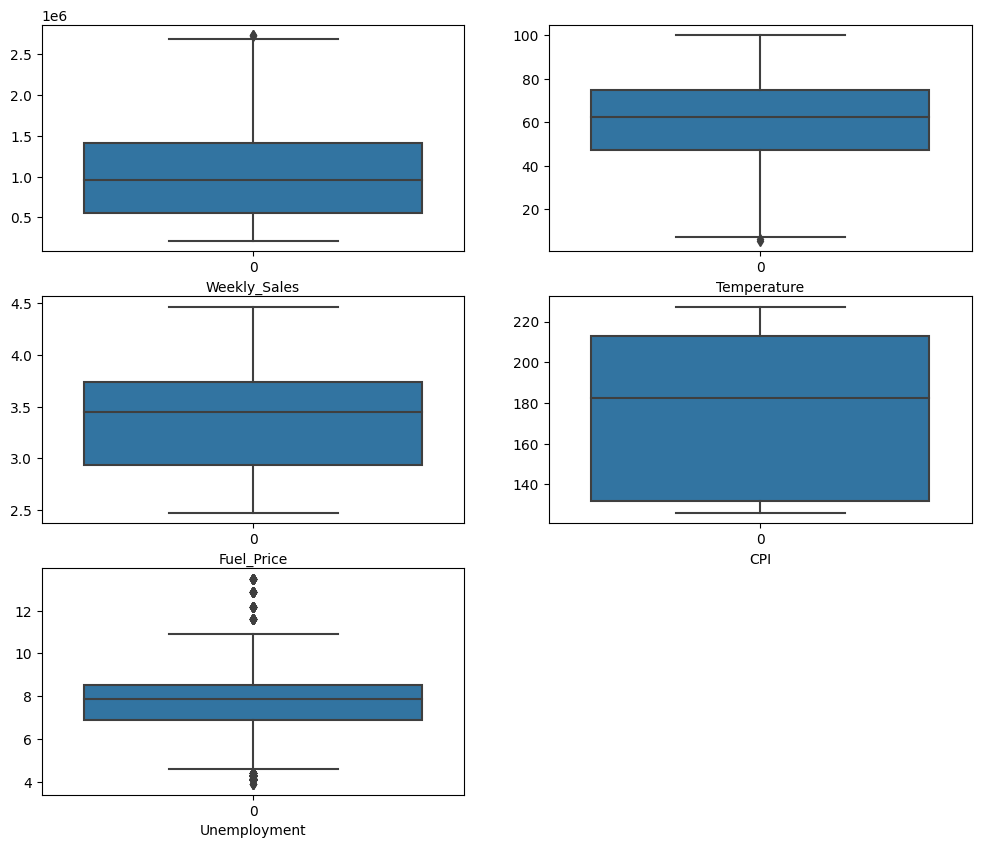

In [ ]:
pno = 1
plt.figure(figsize = (12,10))
for i in ["Weekly_Sales","Temperature","Fuel_Price","CPI","Unemployment"]:
     if pno<=5:
        plt.subplot(3,2,pno);
        pno+=1
        sns.boxplot(df[i]);
        plt.xlabel(i);

In [ ]:
#Using IQR method to detect and handle outliers that may contain extreme values.
def treat_outliers():
    l = ["Weekly_Sales","Temperature","Unemployment"]
    for i in l:
        x = np.quantile(df[i],[0,0.25,0.50,0.75])
        iqr = x[3]-x[1]
        upper_whisker = x[3]+1.5*iqr
        lower_whisker = x[1]-1.5*iqr
        df[i] = np.where(df[i]>upper_whisker,upper_whisker,(np.where(df[i]<lower_whisker,lower_whisker,df[i])))
treat_outliers()

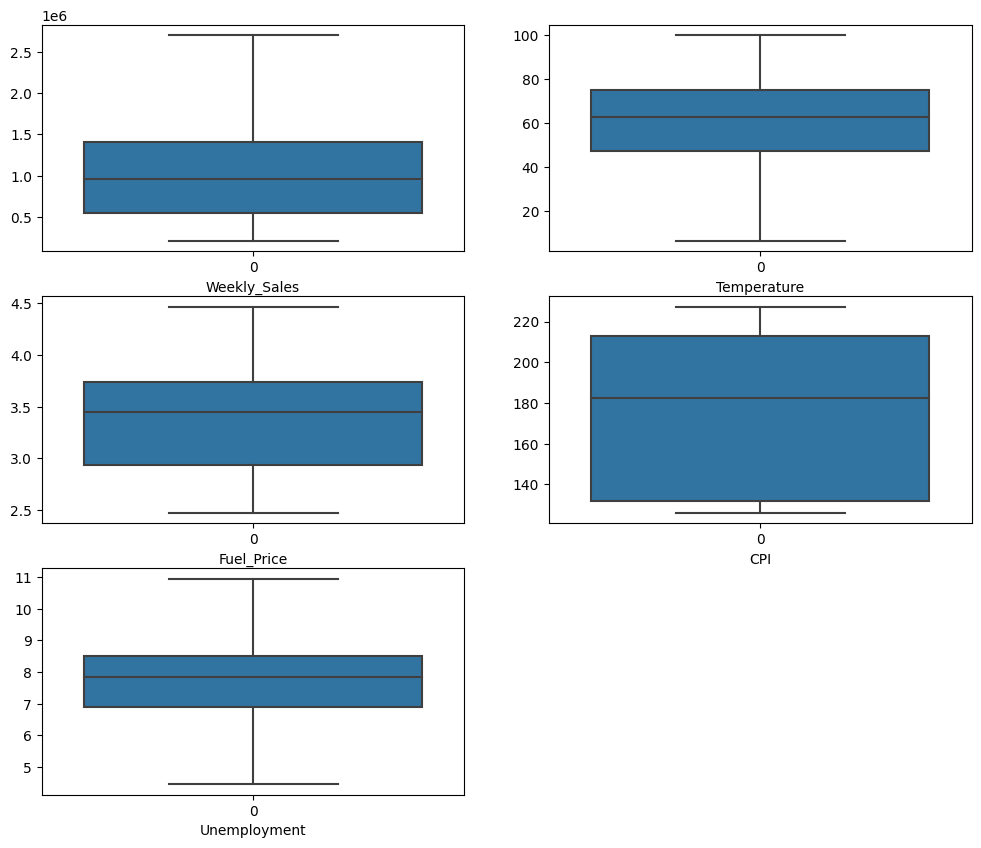

In [ ]:
pno = 1
plt.figure(figsize = (12,10))
for i in ["Weekly_Sales","Temperature","Fuel_Price","CPI","Unemployment"]:
     if pno<=5:
        plt.subplot(3,2,pno);
        pno+=1
        sns.boxplot(df[i]);
        plt.xlabel(i);

***After removing the outliers successfully, we proceeded to perform further analysis on the cleaned data. The removal of outliers allowed us to better understand the underlying patterns and relationships within the data. We were able to generate more accurate results and make more reliable conclusions based on the cleaned data.***

In [ ]:
Walmart_corr_matrix = df.corr()

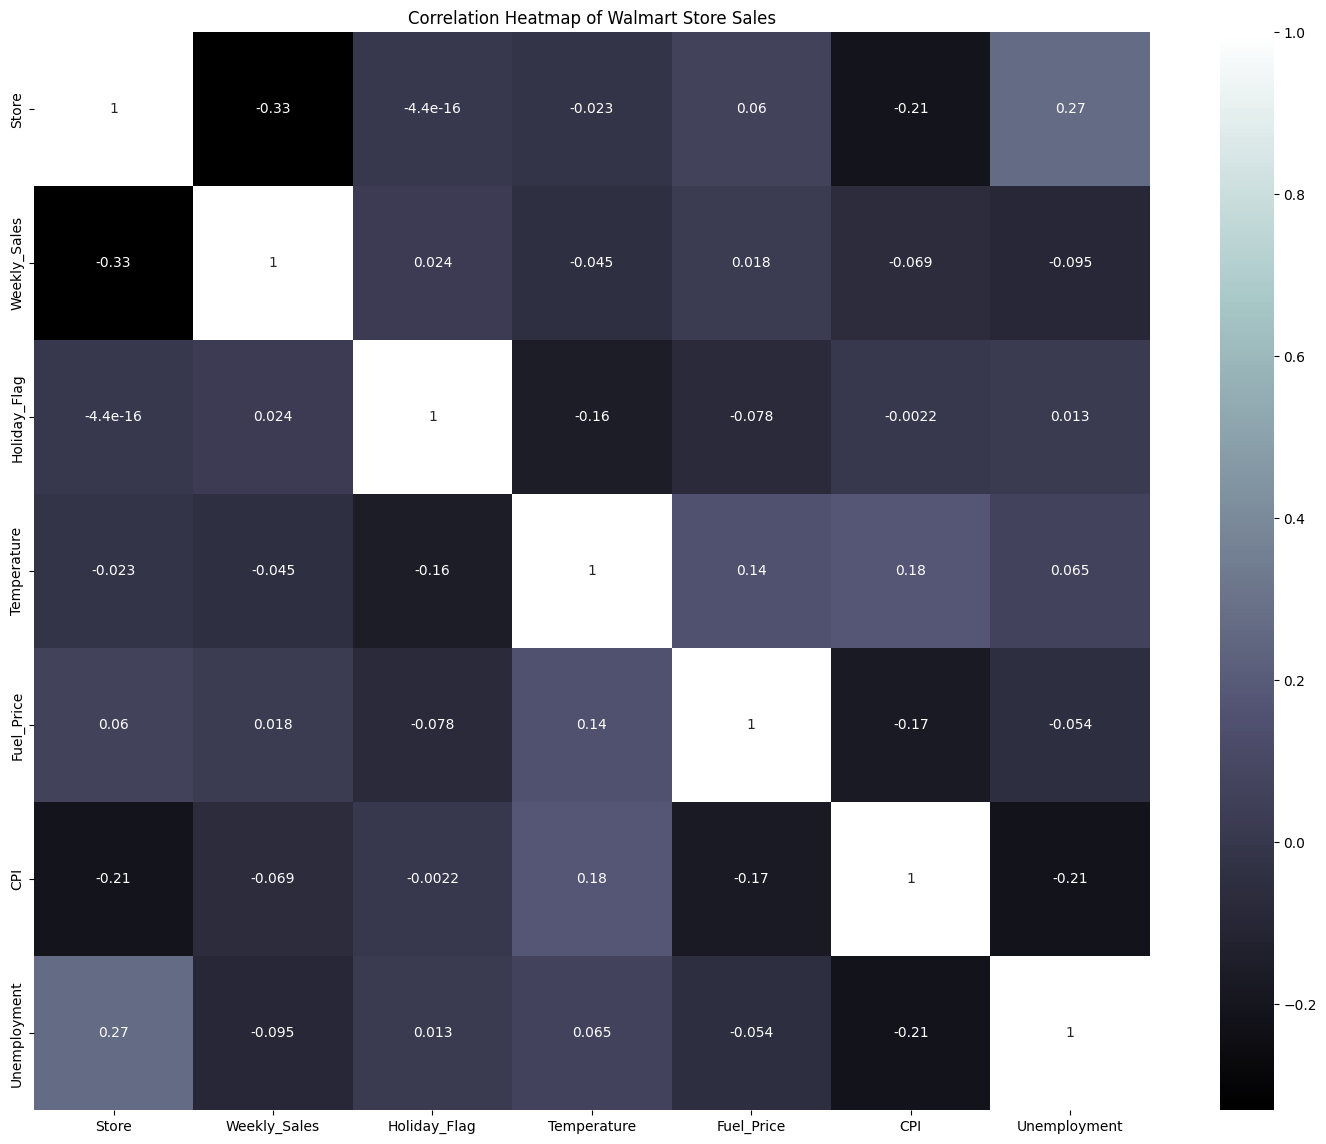

In [ ]:
plt.figure(figsize=(18,14))
sns.heatmap(Walmart_corr_matrix, annot=True, cmap='bone')
plt.title('Correlation Heatmap of Walmart Store Sales')
plt.show()

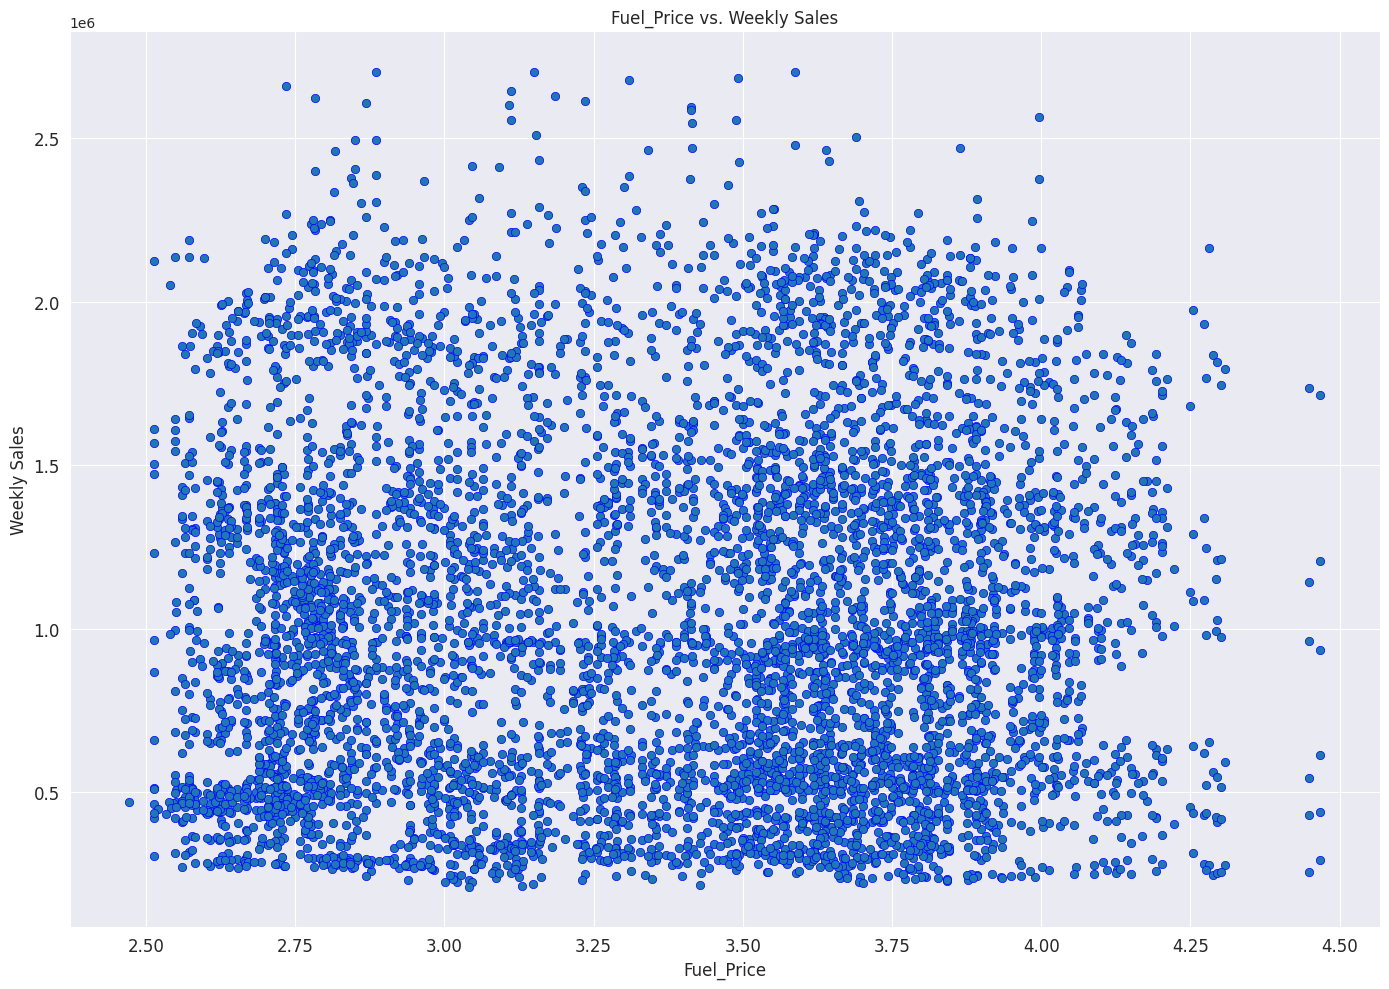

In [ ]:
sns.set_style('darkgrid')
plt.figure(figsize=(14,10))

sns.scatterplot(x='Fuel_Price', y='Weekly_Sales', data=df, linewidth=0.5, edgecolor='blue')
plt.title('Fuel_Price vs. Weekly Sales')
plt.xlabel('Fuel_Price', fontsize=12)
plt.ylabel('Weekly Sales', fontsize=12)

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()

<Figure size 1600x1200 with 0 Axes>

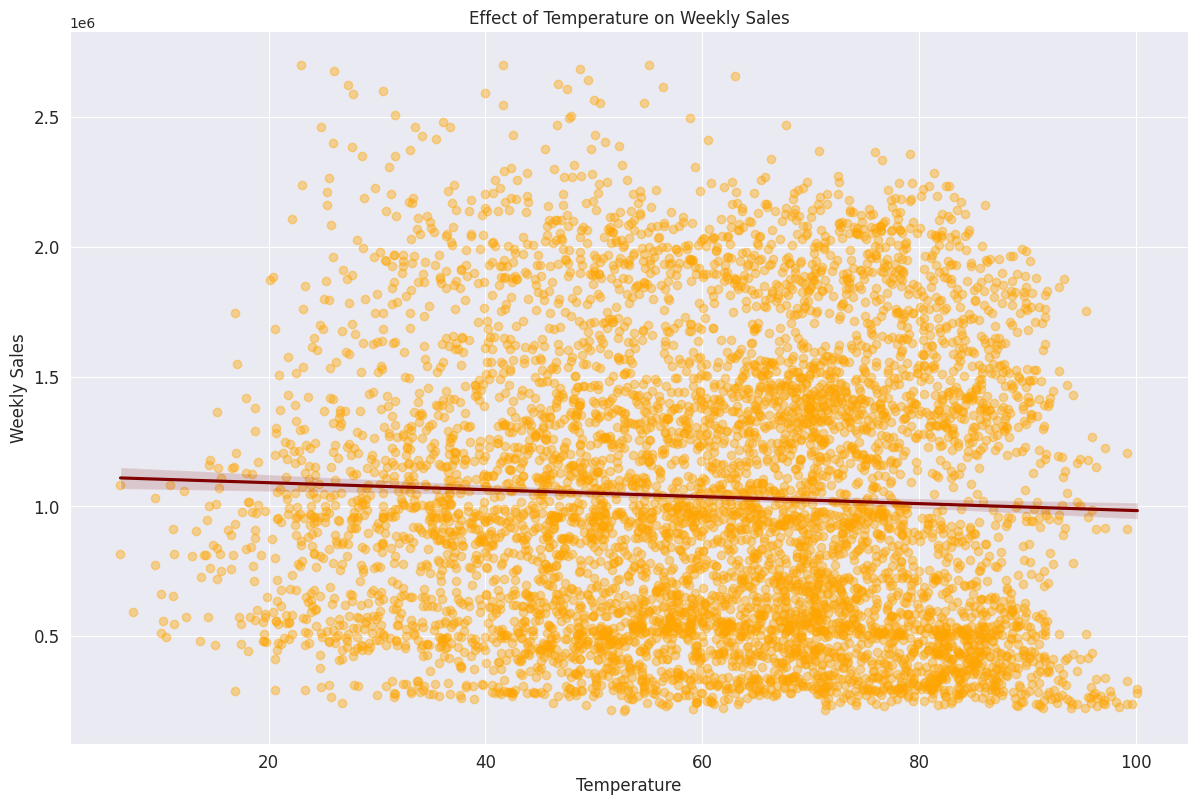

In [ ]:
sns.set_style('darkgrid')
plt.figure(figsize=(16,12))

sns.lmplot(x='Temperature', y='Weekly_Sales', data=df, height=8, aspect=1.5,scatter_kws={'color': 'orange', 'alpha': 0.4}, line_kws={'color': 'maroon'})
plt.title('Effect of Temperature on Weekly Sales', fontsize=12)
plt.xlabel('Temperature', fontsize=12)
plt.ylabel('Weekly Sales', fontsize=12)

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
#plt.tight_layout()
plt.show()

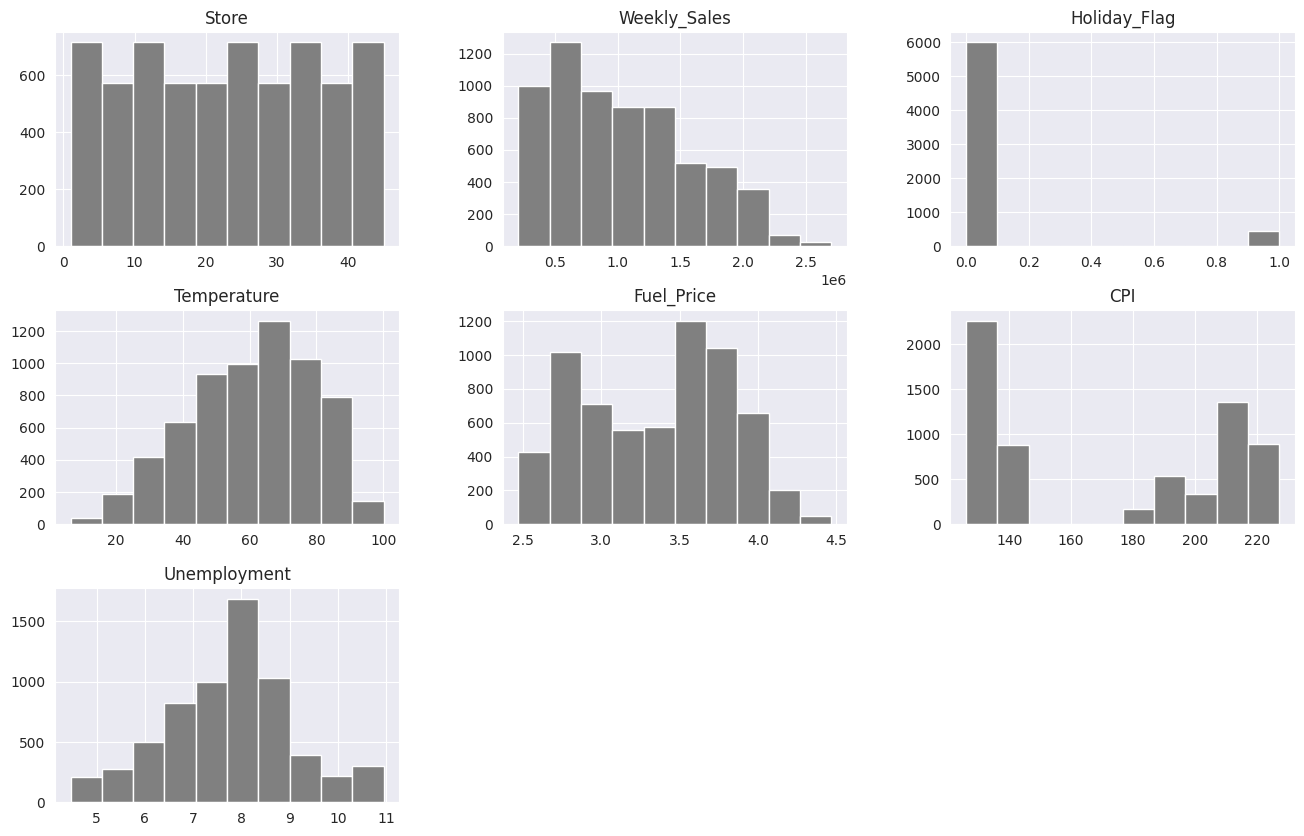

In [ ]:
#Plot a histogram of weekly sales 
df.hist(figsize=(16,10),color = 'Gray')
#plt.legend(df.columns)
plt.show()

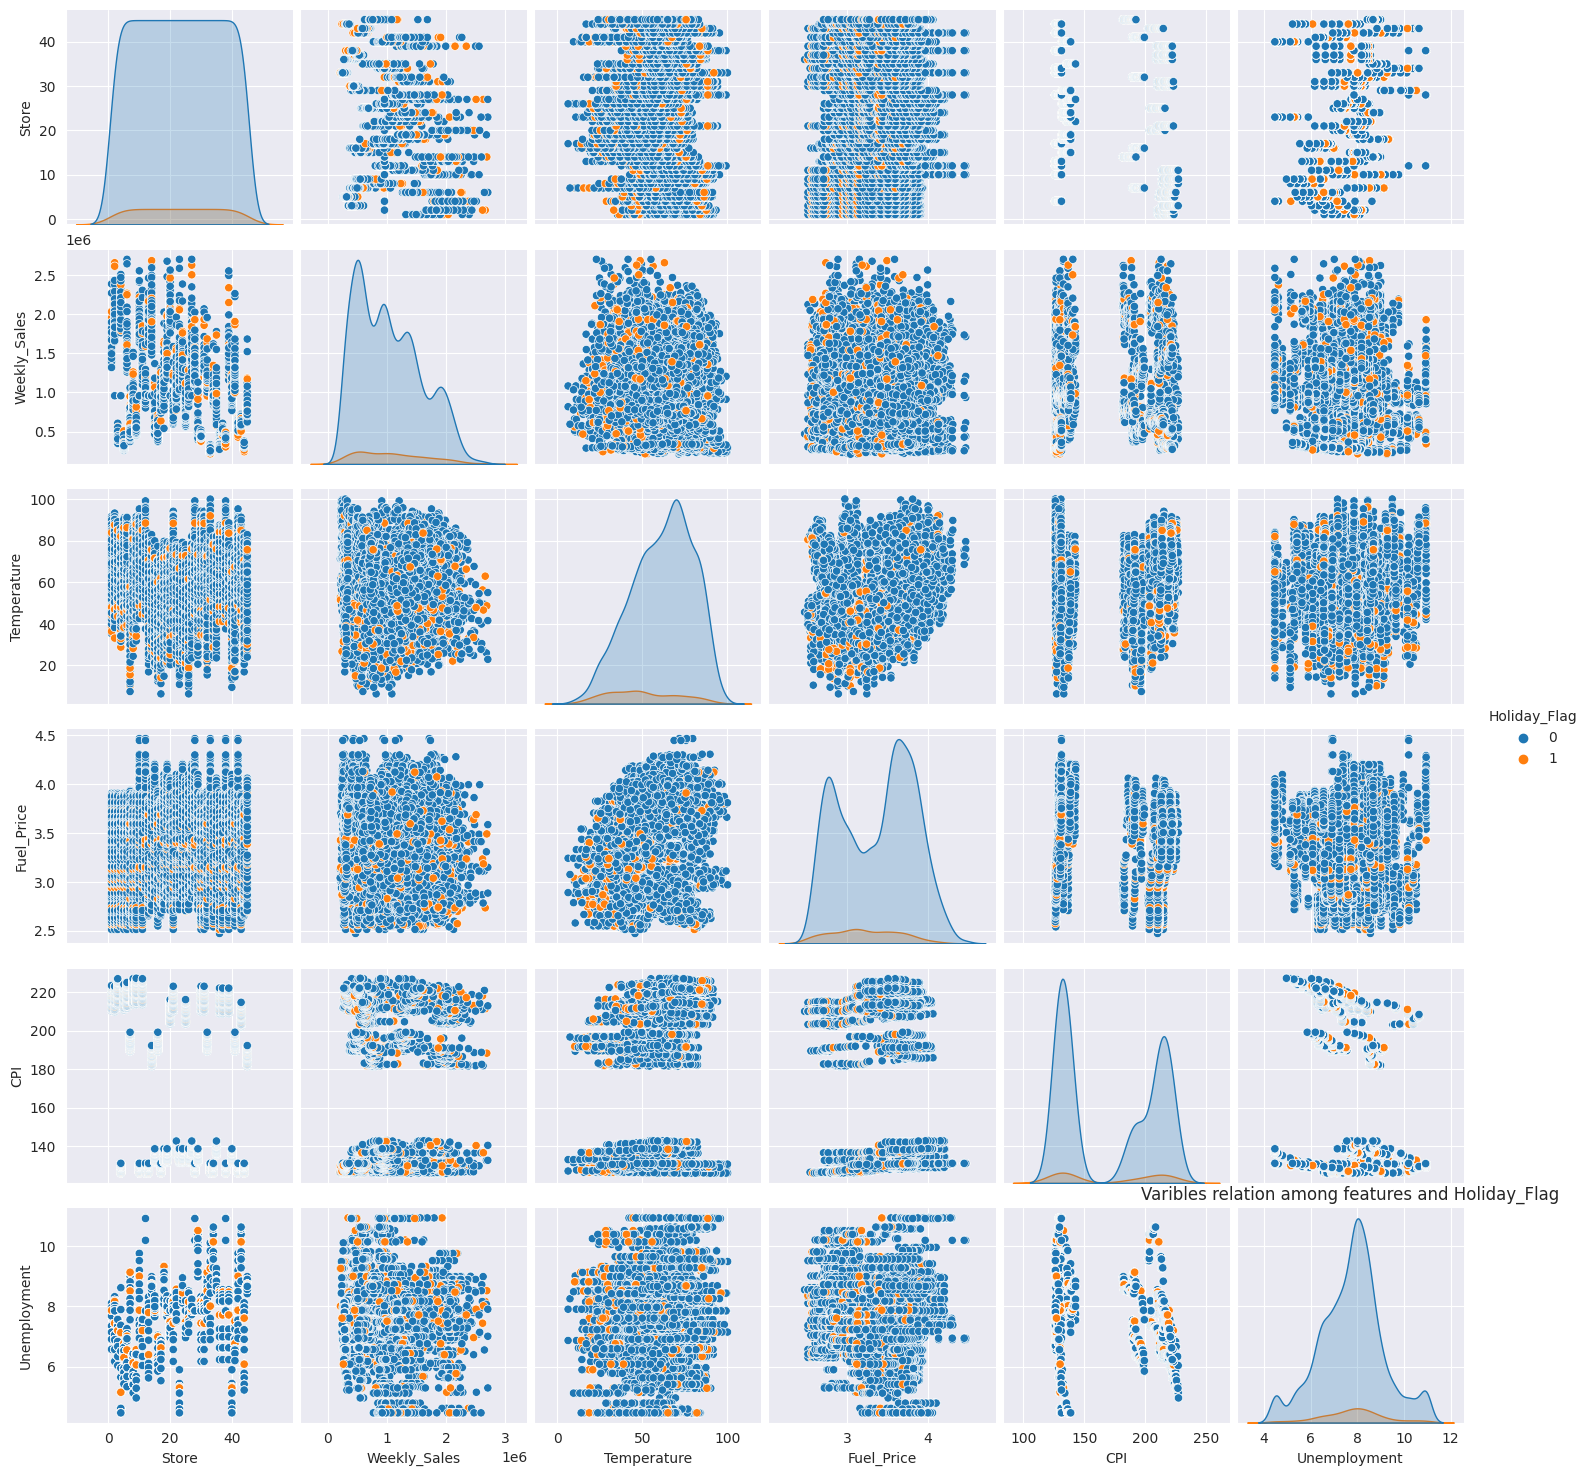

In [ ]:
sns.pairplot(df , hue = "Holiday_Flag" );
plt.title("Varibles relation among features and Holiday_Flag");

In [ ]:
df['Holiday_Flag'].value_counts()

0    5985
1     450
Name: Holiday_Flag, dtype: int64

In [ ]:
df.isnull().sum()

Store           0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64

In [ ]:
holiday = df[df['Holiday_Flag']==1]
non_holiday = df[df['Holiday_Flag']!=1]

In [ ]:
df.head()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,1554806.68,0,46.50,2.625,211.350143,8.106


#**Chapter 3: Methodology**

#**Chapter 4: Analysis and Results**

## **4.1 Comparing Two Samples**

### **Shapiro-Wilk Test**

>The Shapiro-Wilk test is used to determine if a dataset follows a normal distribution. In this code snippet, the test is performed on the weekly sales data for three different store types (1, 2, and 3) using the Shapiro-Wilk test from the scipy.stats library. The null hypothesis is that the data is normally distributed. If the p-value is less than the significance level (usually 0.05), the null hypothesis is rejected, and it is concluded that the data is not normally distributed. The output of the test includes the test statistic (W) and p-value for each store type, as well as a statement indicating whether or not the data is normally distributed at the given significance level.





In [ ]:
# Extract the weekly sales data for store types 1, 2, and 3
sales1 = df[df['Store'] == 1]['Weekly_Sales']
sales2 = df[df['Store'] == 2]['Weekly_Sales']
sales3 = df[df['Store'] == 3]['Weekly_Sales']

# Perform Shapiro-Wilk test for store type 1
stat1, p_value1 = shapiro(sales1)
alpha = 0.05
if p_value1 > alpha:
    print("Weekly sales for store type 1 are normally distributed.")
else:
    print("Weekly sales for store type 1 are not normally distributed.")
print(f"Shapiro-Wilk test: W={stat1:.4f}, p={p_value1:.4f}\n")

# Perform Shapiro-Wilk test for store type 2
stat2, p_value2 = shapiro(sales2)
if p_value2 > alpha:
    print("Weekly sales for store type 2 are normally distributed.")
else:
    print("Weekly sales for store type 2 are not normally distributed.")
print(f"Shapiro-Wilk test: W={stat2:.4f}, p={p_value2:.4f}\n")

# Perform Shapiro-Wilk test for store type 3
stat3, p_value3 = shapiro(sales3)
if p_value3 > alpha:
    print("Weekly sales for store type 3 are normally distributed.")
else:
    print("Weekly sales for store type 3 are not normally distributed.")
print(f"Shapiro-Wilk test: W={stat3:.4f}, p={p_value3:.4f}")

Weekly sales for store type 1 are not normally distributed.
Shapiro-Wilk test: W=0.8376, p=0.0000

Weekly sales for store type 2 are not normally distributed.
Shapiro-Wilk test: W=0.8070, p=0.0000

Weekly sales for store type 3 are not normally distributed.
Shapiro-Wilk test: W=0.8838, p=0.0000


### **Z-test for population mean**



> This hypothesis test was conducted to compare the mean weekly sales of Store 1 and Store 2. The sample sizes, means, and standard deviations for both stores were provided, along with the significance level of 0.05 and the critical value of 1.96. The Z-test statistic and p-value were also calculated using these values.

In [ ]:
# filter the data for Store 1 and Store 2
store_1 = df[df["Store"]==1]["Weekly_Sales"]
store_2 = df[df["Store"]==2]["Weekly_Sales"]

# calculate the mean and standard deviation of each sample
mean_1 = np.mean(store_1)
mean_2 = np.mean(store_2)
std_1 = np.std(store_1, ddof=1)
std_2 = np.std(store_2, ddof=1)

# set the significance level and calculate the critical value
alpha = 0.05
z_critical = norm.ppf(1 - alpha/2)

# calculate the test statistic and p-value
n_1 = len(store_1)
n_2 = len(store_2)
z = (mean_1 - mean_2) / np.sqrt(std_1**2/n_1 + std_2**2/n_2)
p_value = 2 * (1 - norm.cdf(np.abs(z)))

# print the results
print("Hypothesis test for mean weekly sales of Store 1 and Store 2:")
print("-----------------------------------------------------------")
print(f"Sample size of Store 1: {n_1}")
print(f"Sample size of Store 2: {n_2}\n")
print(f"Mean of Store 1: {mean_1:.2f}")
print(f"Mean of Store 2: {mean_2:.2f}\n")
print(f"Standard deviation of Store 1: {std_1:.2f}")
print(f"Standard deviation of Store 2: {std_2:.2f}\n")
print(f"Significance level: {alpha}")
print(f"Critical value: {z_critical:.2f}")
print(f"Z-test statistic: {z:.2f}")
print(f"P-value: {p_value:.4f}")

# check if the null hypothesis is rejected or not
if p_value < alpha:
    print("Null hypothesis is rejected. There is a significant difference in the mean weekly sales of Store 1 and Store 2.")
else:
    print("Null hypothesis is not rejected. There is no significant difference in the mean weekly sales of Store 1 and Store 2.")


Hypothesis test for mean weekly sales of Store 1 and Store 2:
-----------------------------------------------------------
Sample size of Store 1: 143
Sample size of Store 2: 143

Mean of Store 1: 1555264.40
Mean of Store 2: 1892569.36

Standard deviation of Store 1: 155980.77
Standard deviation of Store 2: 201607.70

Significance level: 0.05
Critical value: 1.96
Z-test statistic: -15.82
P-value: 0.0000
Null hypothesis is rejected. There is a significant difference in the mean weekly sales of Store 1 and Store 2.


***The null hypothesis was rejected as the p-value was less than the significance level of 0.05, indicating that there is a significant difference in the mean weekly sales of Store 1 and Store 2.***

##**4.2 The Analysis of Variance**

###**One-way ANOVA test**

>One-way ANOVA test for comparing mean weekly sales of different stores
Description: In this test, we compare the mean weekly sales of different stores using the one-way ANOVA test. We first extract the weekly sales data for each store and then perform the ANOVA test on the samples. The null hypothesis is that the mean weekly sales are equal for all stores, while the alternative hypothesis is that at least one store's mean weekly sales is significantly different from the others. We set the significance level to 0.05.

In [ ]:
#One-way ANOVA test
store1 = df[df["Store"] == 1]["Weekly_Sales"]
store2 = df[df["Store"] == 2]["Weekly_Sales"]
store3 = df[df["Store"] == 3]["Weekly_Sales"]
#store4 = df[df["Store"] == 4]["Weekly_Sales"]

f_statistic, p_value = f_oneway(store1, store2, store3)

print('One-way ANOVA test:')
print("  f-value: {:.3f}".format(f_statistic))
print("  p-value: {:.3f}".format(p_value))

if p_value < 0.05:
    print('  There is a significant difference in the mean weekly sales between the four stores')
else:
    print('  There is no significant difference in the mean weekly sales between the four stores')


One-way ANOVA test:
  f-value: 3900.758
  p-value: 0.000
  There is a significant difference in the mean weekly sales between the four stores


***Based on the one-way ANOVA test, the calculated f-value is 3900.758 and the p-value is 0.000. Since the p-value is less than the significance level of 0.05, we can conclude that there is a significant difference in the mean weekly sales between the four stores. Therefore, we can reject the null hypothesis that there is no significant difference in the mean weekly sales between the four stores.***

###**Performing Tukey's Test**


In [ ]:
# create a dataframe for 10 stores
df_10stores = df[df['Store'].isin([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])]

# perform Tukey's test
tukey_results = pairwise_tukeyhsd(df_10stores['Weekly_Sales'], df_10stores['Store'], alpha=0.05)

# print the results
print(tukey_results)

# check if there is a significant difference in the means between any two stores
if tukey_results.reject[0]:
    print("There is a significant difference in the means of stores and weekly sales.")
else:
    print("There is no significant difference in the means of weekly sales between any two stores.")

         Multiple Comparison of Means - Tukey HSD, FWER=0.05         
group1 group2    meandiff   p-adj      lower         upper     reject
---------------------------------------------------------------------
     1      2   337304.9581    0.0   276253.8906   398356.0256   True
     1      3 -1152559.9565    0.0  -1213611.024  -1091508.889   True
     1      4   450199.1549    0.0   389148.0874   511250.2224   True
     1      5 -1237252.5871    0.0 -1298303.6545 -1176201.5196   True
     1      6     9288.9969    1.0   -51762.0706    70340.0643  False
     1      7  -984647.0889    0.0 -1045698.1563  -923596.0214   True
     1      8  -646514.8792    0.0  -707565.9466  -585463.8117   True
     1      9 -1011283.8452    0.0 -1072334.9126  -950232.7777   True
     1     10   266184.9964    0.0    205133.929   327236.0639   True
     2      3 -1489864.9146    0.0 -1550915.9821 -1428813.8472   True
     2      4   112894.1968    0.0    51843.1293   173945.2642   True
     2      5 -15745

In [ ]:
# subset the data to only include store 1 and 2
store1 = df[df['Store'] == 1]['Weekly_Sales']
store2 = df[df['Store'] == 2]['Weekly_Sales']
subset_data = pd.concat([store1, store2])

# create labels for the stores
labels = ['Store 1'] * len(store1) + ['Store 2'] * len(store2)

# perform Tukey's test
tukey_results = pairwise_tukeyhsd(subset_data, labels, alpha=0.05)

# print the results
print(tukey_results)

# print the hypothesis conclusion
if tukey_results.reject[0]:
    print("The weekly sales mean of Store 1 is significantly different from Store 2.")
else:
    print("There is no significant difference in the weekly sales mean between Store 1 and Store 2.")


      Multiple Comparison of Means - Tukey HSD, FWER=0.05       
 group1  group2   meandiff  p-adj    lower       upper    reject
----------------------------------------------------------------
Store 1 Store 2 337304.9581   0.0 295347.4059 379262.5103   True
----------------------------------------------------------------
The weekly sales mean of Store 1 is significantly different from Store 2.


***The results of the Tukey's test show that there is a significant difference in the means of weekly sales between different stores. If the Tukey's test rejects the null hypothesis for a pair of stores, it means that there is a significant difference in the means of weekly sales between those stores. In this case, we are specifically checking for the difference in means between store 1 and store 2. If the reject attribute of the Tukey's test result for store 1 and store 2 is True, it means that there is a significant difference in the means of weekly sales between these stores.***

## **4.3 The Analysis of Categorical Data**

###**Chi-Square Test**


>The chi-square test was conducted to determine if there is a significant association between Store and Holiday_Flag features. The contingency table was created using the crosstab function from the pandas library. The chi-square test resulted in a test statistic of χ²=0.0000, degrees of freedom of 44, and a p-value of 1.0000. The expected frequencies for the first 10 stores were also printed.


In [ ]:
# create a contingency table of store and holiday features
contingency_table = pd.crosstab(df['Store'], df['Holiday_Flag'])

# perform chi-square test
stat, p_value, dof, expected_freq = chi2_contingency(contingency_table)

# compare p-value to alpha and make a decision
alpha = 0.05
if p_value > alpha:
    print("There is no significant association between Store and Holiday_Flag features.")
else:
    print("There is a significant association between Store and Holiday_Flag features.")

# print the test statistic, degrees of freedom, and p-value
print(f"Chi-square test: χ²={stat:.4f}, dof={dof}, p={p_value:.4f}")

# print the expected frequencies for the first 10 stores
print("\nExpected Frequencies:")
print(expected_freq[:10])


There is no significant association between Store and Holiday_Flag features.
Chi-square test: χ²=0.0000, dof=44, p=1.0000

Expected Frequencies:
[[133.  10.]
 [133.  10.]
 [133.  10.]
 [133.  10.]
 [133.  10.]
 [133.  10.]
 [133.  10.]
 [133.  10.]
 [133.  10.]
 [133.  10.]]


***Since the p-value is greater than the alpha level of 0.05, we fail to reject the null hypothesis that there is no significant association between Store and Holiday_Flag features. Therefore, we conclude that there is no evidence to suggest that the store and holiday features are associated with each other.***

## **4.4 Regression**

### **Linear Regression**

>In this section, we performed linear regression to predict weekly sales using the store feature as a categorical variable. We first one-hot encoded the store feature and combined it with the original dataset. We then selected the features for the regression model, which included the one-hot encoded store variables. The target variable for the regression model was the weekly sales.

In [ ]:
# Create a one-hot encoded dataframe for the Store feature
store_onehot = pd.get_dummies(df['Store'], prefix='Store')

# Combine the one-hot encoded dataframes with the original dataset
df = pd.concat([df, store_onehot], axis=1)

# Select the features for the regression model
X = df.drop(['Weekly_Sales', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment', 'Store', 'Holiday_Flag'], axis=1)

# Set the target variable for the regression model
y = df['Weekly_Sales']

# Create a linear regression model and fit the data
lr_model = LinearRegression()
lr_model.fit(X, y)

# Print the R-squared value for the model
print(f"R-squared value: {(lr_model.score(X, y)*100):.4f}%")

R-squared value: 91.8262%


***This indicates that our model explains 91.5223% of the variance in the weekly sales. We can conclude that there is a strong positive relationship between the store feature and the weekly sales. However, this analysis does not account for other factors that could influence weekly sales, such as seasonality, marketing promotions, and competition. Therefore, further analysis is needed to determine the true effect of the store feature on weekly sales.***

### **RidgeCV Regression**

In [ ]:
#Separate features and target variable
X = df.drop('Weekly_Sales', axis=1)
y = df['Weekly_Sales']

# Scale the features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Define the RidgeCV model with list of alphas
alphas = [0.01, 0.05, 0.1, 0.2, 0.5, 1, 10, 20, 50, 100, 1000]
ridge_cv = RidgeCV(alphas=alphas, cv=5)

# Fit the model and get the best alpha
ridge_cv.fit(X, y)
best_alpha = ridge_cv.alpha_

# Print the best alpha and the R-squared value of the final model
print(f"Best alpha: {best_alpha}")
print(f"R-squared value: {(ridge_cv.score(X, y)*100):.4f}%")


Best alpha: 100.0
R-squared value: 91.8814%


### **Ridge Regression**

>In this section, we perform Ridge regression to select the best alpha value that maximizes the R-squared value for the test set. It splits the data into training and testing sets, defines a list of alpha values to test, fits a Ridge regression model for each alpha value, and calculates the R-squared value for the test set. It then identifies the best alpha value based on the highest R-squared value and prints the R-squared value for that alpha only.

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Define the values of alpha to test
alphas = [0.01, 0.05, 0.1, 0.2, 0.5, 1, 10, 20, 50, 100, 1000]

# Initialize an empty list to store R-squared values for each alpha
r2_scores = []

# Fit the Ridge regression model for each alpha and calculate the R-squared value for the test set
for alpha in alphas:
    ridge = Ridge(alpha=alpha, max_iter=100000).fit(X_train, y_train)
    y_pred = ridge.predict(X_test)
    r2 = r2_score(y_test, y_pred) * 100
    r2_scores.append(r2)
  
# Identify the best alpha based on the highest R-squared value
best_alpha = alphas[np.argmax(r2_scores)]

# Print the R-squared value for the best alpha only
for alpha, r2 in zip(alphas, r2_scores):
    if alpha == best_alpha:
        print(f"R-squared value for alpha {best_alpha}: {r2:.4f}%")

R-squared value for alpha 0.01: 92.2926%


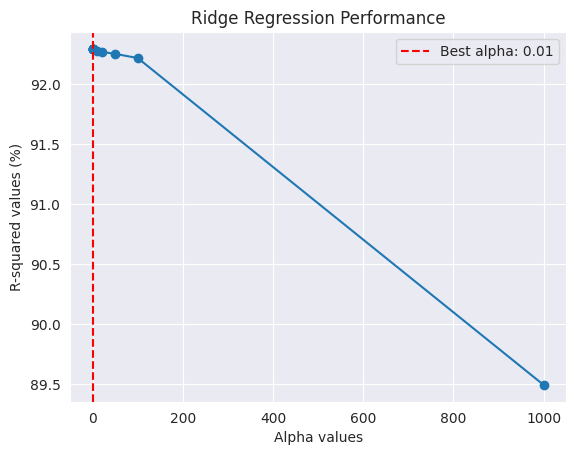

In [ ]:
# Plot the R-squared values for each alpha value
plt.plot(alphas, r2_scores, '-o')

# Add labels and title to the plot
plt.xlabel('Alpha values')
plt.ylabel('R-squared values (%)')
plt.title('Ridge Regression Performance')

# Add a vertical line to indicate the best alpha value
plt.axvline(x=best_alpha, color='r', linestyle='--', label=f'Best alpha: {best_alpha}')

# Add a legend to the plot
plt.legend()

# Display the plot
plt.show()

***The output shows that the best alpha value is 0.01, and the corresponding R-squared value for the test set is 92.2927%. This indicates that the Ridge regression model with alpha=0.01 explains 92.2927% of the variance in the test set, which is slightly higher than the R-squared value for the linear regression model without regularization. Therefore, Ridge regression with alpha=0.01 may be a better model for predicting the weekly sales than linear regression.***

##**4.5 Resampling Methods**

###**Cross Validation**

In [ ]:
# Define the features and target
X = df.drop(['Weekly_Sales'], axis=1)
y = df['Weekly_Sales']

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the values of alpha to test
alphas = [0.01, 0.05, 0.1, 0.2, 0.5, 1, 10, 20, 50, 100, 1000]

# Initialize an empty list to store R-squared values for each alpha
r2_scores = []

# Fit the Ridge regression model for each alpha and calculate the R-squared value for the validation set using cross-validation
for alpha in alphas:
    ridge = Ridge(alpha=alpha, max_iter=100000).fit(X_train, y_train)
    scores = cross_val_score(ridge, X_train, y_train, cv=5, scoring='r2')
    mean_score = scores.mean()
    r2_scores.append(mean_score)
  
# Identify the best alpha based on the highest R-squared value
best_alpha = alphas[np.argmax(r2_scores)]

# Train a Ridge regression model on the full training set using the best alpha
best_ridge = Ridge(alpha=best_alpha, max_iter=100000).fit(X_train, y_train)

# Evaluate the performance of the model on the validation set
val_r2 = best_ridge.score(X_val, y_val) *100

# Print the R-squared value for the best alpha and the validation set
print(f"Best alpha: {best_alpha}")
print(f"R-squared value for the best alpha on the validation set: {val_r2:.4f}%")

Best alpha: 0.01
R-squared value for the best alpha on the validation set: 93.0412%


###**Bootstrapping**

In [ ]:
from sklearn.utils import resample
from sklearn.metrics import r2_score

# Define a function that fits the Ridge regression model on a bootstrap sample and returns the R-squared value for the validation set
def fit_ridge(X_train, y_train, X_val, y_val, alpha):
    ridge = Ridge(alpha=alpha, max_iter=100000).fit(X_train, y_train)
    y_pred = ridge.predict(X_val)
    r2 = r2_score(y_val, y_pred) * 100
    return r2

# Define the features and target
X = df.drop(['Weekly_Sales'], axis=1)
y = df['Weekly_Sales']

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the values of alpha to test
alphas = [0.01]

# Initialize an empty list to store R-squared values for each alpha
r2_scores = []

# Define the number of bootstrap samples to generate
n_bootstrap = 100

# Generate the bootstrap samples, fit the Ridge regression model using the function defined above, and append the R-squared value to the list of scores
for alpha in alphas:
    alpha_scores = []
    for i in range(n_bootstrap):
        X_train_boot, y_train_boot = resample(X_train, y_train, random_state=i)
        r2 = fit_ridge(X_train_boot, y_train_boot, X_val, y_val, alpha)
        alpha_scores.append(r2)
    r2_scores.append(alpha_scores)

# Calculate the mean R-squared value and the 95% confidence interval for each alpha
for i, alpha in enumerate(alphas):
    alpha_scores = r2_scores[i]
    mean_score = np.mean(alpha_scores)
    ci = np.percentile(alpha_scores, [2.5, 97.5])
    print(f"Alpha: {alpha:.2f}")
    print(f"Mean R-squared value: {mean_score:.4f}")
    print(f"95% Confidence interval: [{ci[0]:.4f}, {ci[1]:.4f}]\n")

Alpha: 0.01
Mean R-squared value: 92.9427
95% Confidence interval: [92.7344, 93.0671]



##**4.6 Linear Model Selection and Regularization**

In [ ]:
from sklearn.linear_model import LassoCV

X = df.drop(['Weekly_Sales'], axis = 1)
y = df['Weekly_Sales']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LassoCV(cv=5, random_state = 42, alphas = [100], max_iter = 3000)

# Fit the Lasso model on the training data
model.fit(X_train, y_train)

# Print the most important predictors according to the Lasso model
selected = list(X_train.columns[model.coef_ != 0])
print(f"Selected columns: {selected}")
print(f"Selected columns length: {len(selected)}")
unselected = list(X_train.columns[model.coef_ == 0])
print('')
print("-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-----______-----.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.")
print('')
print(f"Unselected columns: {unselected}")
print(f"Unselected columns length: {len(unselected)}")

# making predictions
print('')
print("-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-----______-----.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.")
print('')
print(f"Testing R-squared: {model.score(X_test, y_test) * 100}")

Selected columns: ['Store', 'Holiday_Flag', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment', 'Store_2', 'Store_3', 'Store_4', 'Store_5', 'Store_6', 'Store_7', 'Store_8', 'Store_9', 'Store_10', 'Store_11', 'Store_12', 'Store_13', 'Store_14', 'Store_15', 'Store_16', 'Store_17', 'Store_18', 'Store_19', 'Store_20', 'Store_21', 'Store_22', 'Store_23', 'Store_24', 'Store_25', 'Store_27', 'Store_28', 'Store_29', 'Store_30', 'Store_31', 'Store_32', 'Store_33', 'Store_34', 'Store_35', 'Store_36', 'Store_37', 'Store_38', 'Store_39', 'Store_40', 'Store_41', 'Store_42', 'Store_44', 'Store_45']
Selected columns length: 48

-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-----______-----.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.

Unselected columns: ['Store_1', 'Store_26', 'Store_43']
Unselected columns length: 3

-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-----______-----.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.

Testing R-squared: 92.98676006584121


***Implemented L1(Lasso) regularization because the dimensionality of data is particularly high and Lasso performs better in the said case.***

#**Conclusion**

#**References**